We'll start by taking a look at generating points from a parameterized multivariate normal distribution using scipy.stats and making some visualizations. Just as with all the scipy.stats distributions we can either create the distribution object on the fly and apply methods or create a frozen version with fixed parameters. 

In [1]:
import numpy as np

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

from scipy.stats import multivariate_normal, probplot, chi2, poisson

import scipy.spatial.distance as distance

import pandas as pd

import statsmodels.api as sm

import numpy.linalg as LA



In [2]:
multivariate_normal.rvs(mean=[1,-1],cov=[[1,.2],[.2,1]],size=10)

array([[ 0.8007223 , -2.97676595],
       [-0.83514294, -0.02930722],
       [ 0.85810751, -2.45217067],
       [ 1.35034078,  0.31649259],
       [ 1.41753364, -0.5961811 ],
       [ 0.23341848, -0.47650643],
       [ 2.37281165,  0.09767861],
       [ 0.04039207,  0.09122238],
       [ 0.41663579, -0.85388211],
       [ 1.95345046, -1.45380647]])

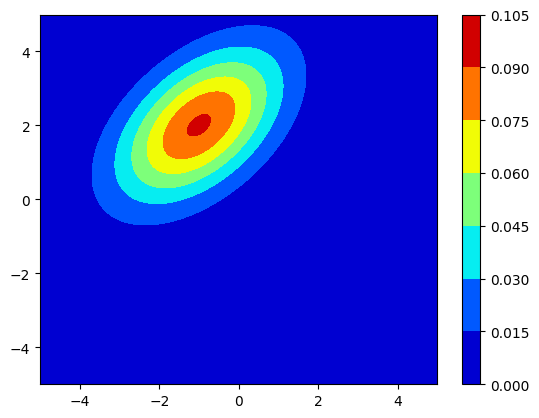

In [3]:
x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.dstack((x, y))

probs =  multivariate_normal.pdf(pos,mean=[-1,2], cov=[[2,1],[1,2]])

plt.contourf(x, y, probs,cmap='jet')
plt.colorbar()

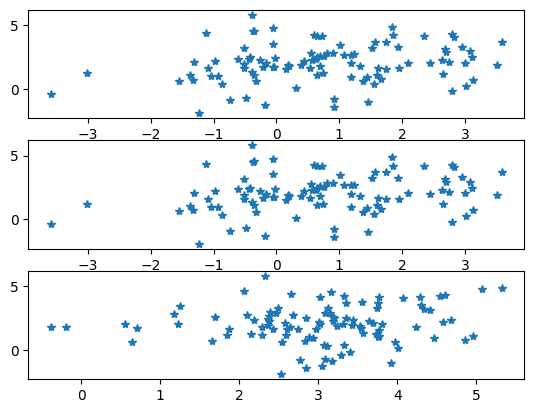

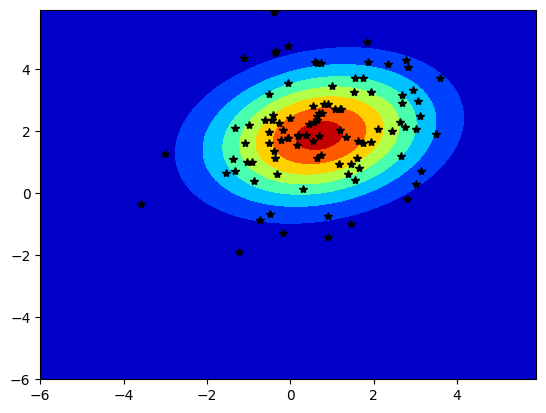

In [4]:
rv_example = multivariate_normal(mean=[1,2,3],cov = [[3,.5,.1],[.5,2,.05],[.1,.05,1]])

example_points = rv_example.rvs(100)

fig = plt.figure()
ax1 = plt.subplot(311)
ax1.plot(example_points[:,0],example_points[:,1],'*')
ax2 = plt.subplot(312)
ax2.plot(example_points[:,0],example_points[:,1],'*')
ax3 = plt.subplot(313)
ax3.plot(example_points[:,2],example_points[:,1],'*')



fig, ax = plt.subplots()
x, y= np.mgrid[-6:6:.1, -6:6:.1]

pos = np.dstack((x, y))

ax.contourf(x, y,rv_example.pdf([np.append(z,0) for k in range(len(pos)) for z in pos[k]]).reshape(120,120),cmap='jet')
ax.plot(example_points[:,0],example_points[:,1],'k*')



Just as with the univariate case, we might want to estimate the properties of a given set of data by trying to represent it as coming from a fixed statistical model. The MLE for mu and Sigma are easy to compute from the data, so it isn’t unreasonale to use those to model our data, although we need to check that normality is a reasonable model before attempting to draw any conclusions. 

Let’s start with a synthetic example and then try it out on the HWAS data from before:

In [5]:
more_points = rv_example.rvs(10000)

print(np.mean(more_points,0))

print(np.cov(more_points.T))

[0.97052342 1.99728308 2.99233779]
[[3.01323892 0.5283382  0.11092161]
 [0.5283382  1.99542814 0.05718522]
 [0.11092161 0.05718522 1.0070481 ]]


In [6]:
rv_example.pdf([np.append(z,0) for k in range(len(pos)) for z in pos[k]]).reshape(120,120)

array([[1.14393874e-12, 1.62217179e-12, 2.28835668e-12, ...,
        2.63858093e-10, 2.03142947e-10, 1.55584337e-10],
       [1.34791148e-12, 1.91306969e-12, 2.70105236e-12, ...,
        3.43988371e-10, 2.65063806e-10, 2.03184183e-10],
       [1.58272460e-12, 2.24827850e-12, 3.17707642e-12, ...,
        4.46891892e-10, 3.44654921e-10, 2.64423037e-10],
       ...,
       [1.31036904e-14, 2.05590213e-14, 3.20881033e-14, ...,
        4.15322408e-07, 3.53778493e-07, 2.99785270e-07],
       [1.02669334e-14, 1.61222221e-14, 2.51849938e-14, ...,
        3.60037072e-07, 3.06950698e-07, 2.60329166e-07],
       [8.01628669e-15, 1.25989030e-14, 1.96981310e-14, ...,
        3.11024393e-07, 2.65394058e-07, 2.25279014e-07]])

(array([  1.,   0.,   1.,   7.,   2.,  12.,  15.,  20.,  43.,  75., 127.,
        189., 250., 299., 414., 486., 580., 633., 796., 720., 806., 756.,
        695., 662., 553., 494., 337., 311., 223., 166., 124.,  76.,  49.,
         31.,  20.,  10.,  10.,   5.,   1.,   1.]),
 array([-5.94976348, -5.61118547, -5.27260745, -4.93402944, -4.59545143,
        -4.25687341, -3.9182954 , -3.57971738, -3.24113937, -2.90256136,
        -2.56398334, -2.22540533, -1.88682731, -1.5482493 , -1.20967129,
        -0.87109327, -0.53251526, -0.19393724,  0.14464077,  0.48321878,
         0.8217968 ,  1.16037481,  1.49895283,  1.83753084,  2.17610886,
         2.51468687,  2.85326488,  3.1918429 ,  3.53042091,  3.86899893,
         4.20757694,  4.54615495,  4.88473297,  5.22331098,  5.561889  ,
         5.90046701,  6.23904502,  6.57762304,  6.91620105,  7.25477907,
         7.59335708]),
 <BarContainer object of 40 artists>)

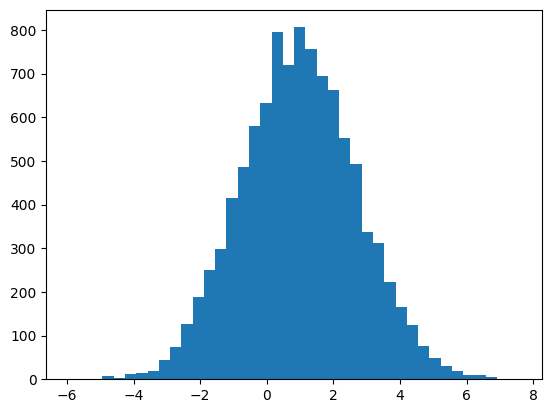

In [7]:
plt.hist(more_points[:,0],bins=40)

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([-3.46946295, -3.11136198, -3.03088034, ...,  6.75508338,
          6.90071228,  7.23541223])),
 (1.4128980254773398, 1.9972830757833846, 0.9999058029485475))

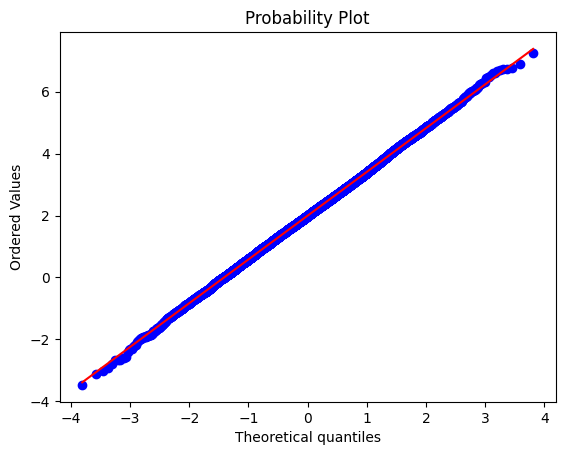

In [8]:
probplot(more_points[:,1],dist='norm',plot=plt)


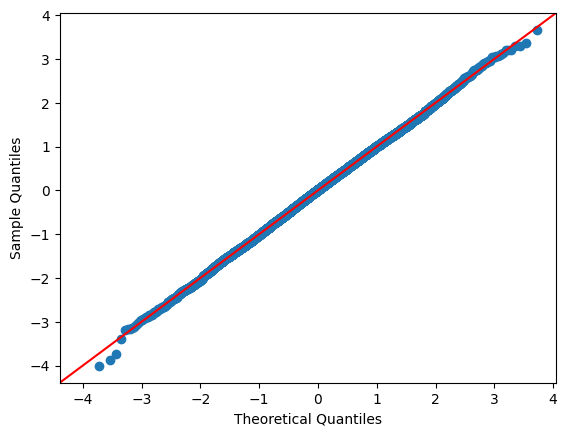

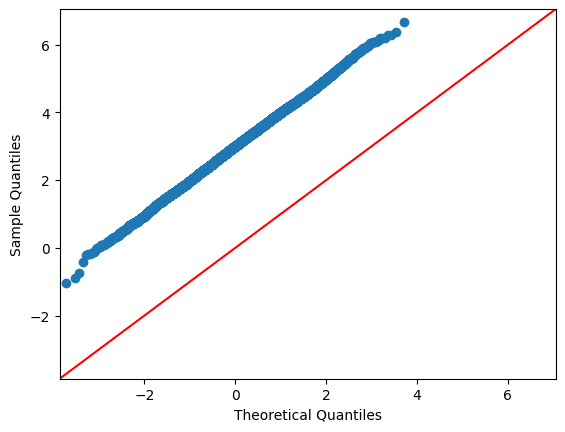

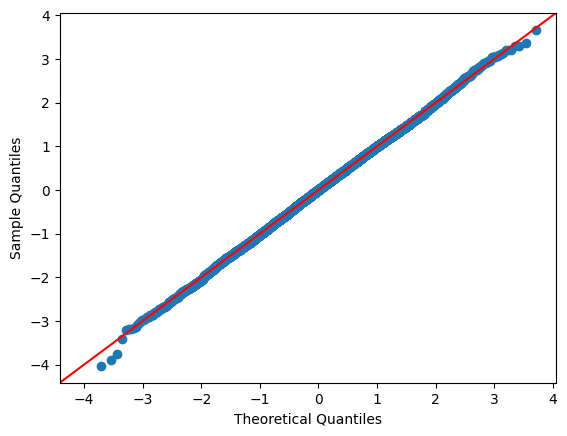

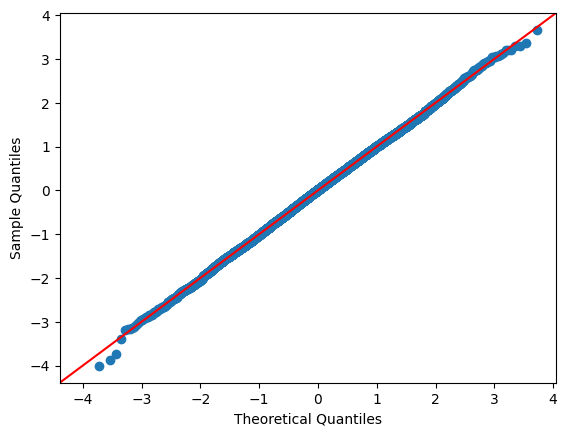

In [9]:
sm.qqplot(more_points[:,2], line='45')

sm.qqplot(more_points[:,2]-3, line='45')

sm.qqplot(more_points[:,2], fit=True, line='45')

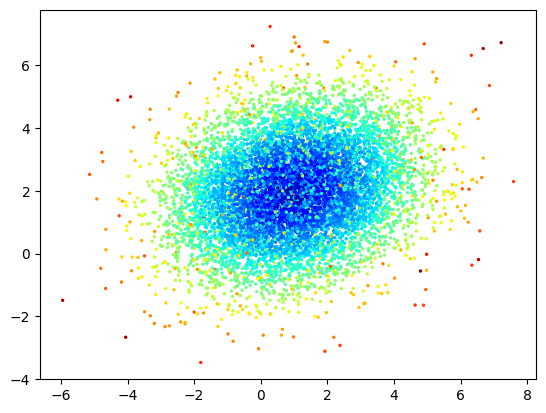

In [10]:
M_distances = np.array([distance.mahalanobis(x, rv_example.mean, LA.inv(rv_example.cov)) for x in more_points])
d = M_distances**2

plt.scatter(more_points[:,0],more_points[:,1],c=M_distances,s=2,cmap='jet')

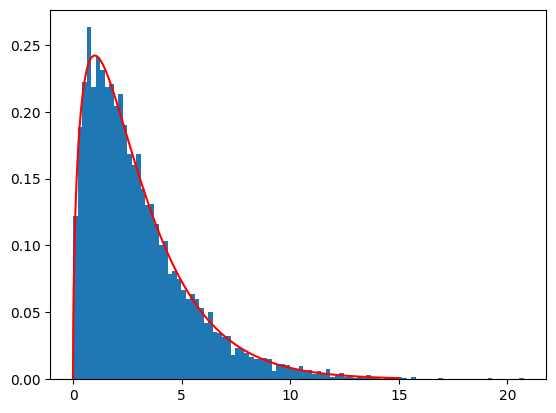

In [11]:
cs = np.arange(0,15,.01)

ds = chi2.pdf(cs,3)

plt.hist(d,bins=100,density=True)

plt.plot(cs,ds,color='r')


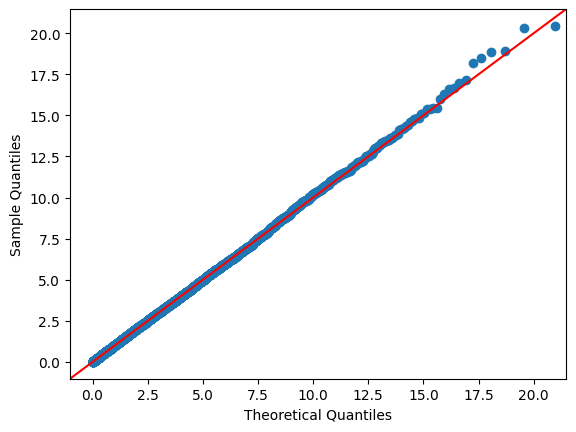

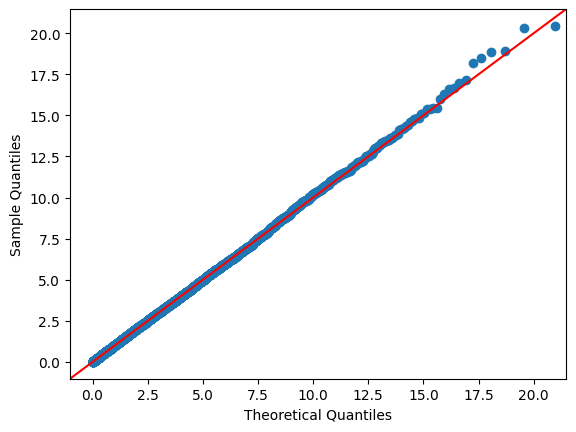

In [12]:
sm.qqplot(d, chi2, distargs=(3,), fit=True, line="45")

When we deal with real data we need to be a little more careful about looking for failures of normality. In the case of the HWAS data below the issue is distributions changing as people age!

In [13]:
HWAS = pd.read_csv('./Height_Weight_Age_Sex.csv')

In [14]:
HWAS.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


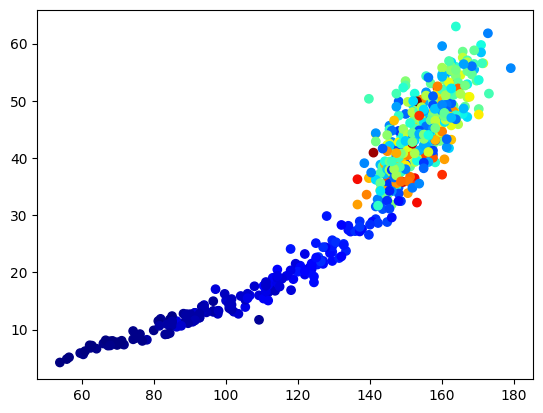

In [15]:
plt.scatter(HWAS['height'],HWAS['weight'],c=HWAS['age'],cmap='jet')

In [16]:
HWASu20 = HWAS[HWAS['age']<20]
HWASo20 = HWAS[HWAS['age']>19]

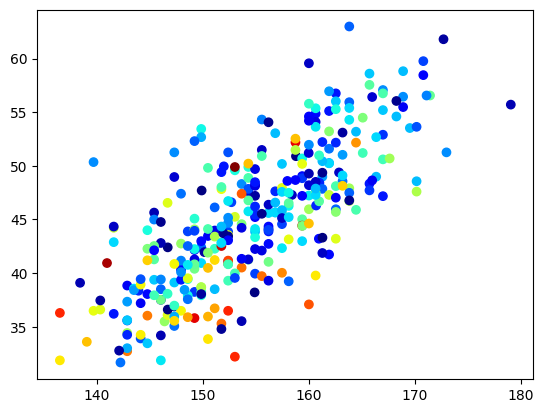

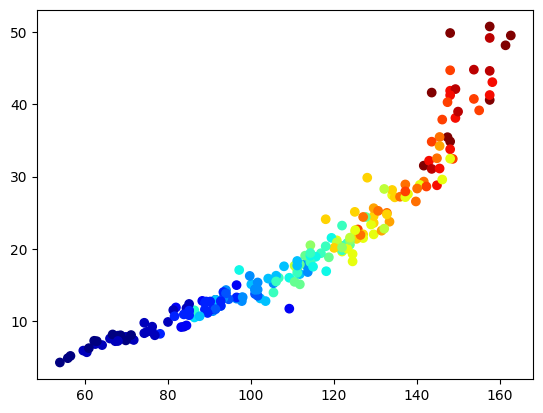

In [17]:
plt.scatter(HWASo20['height'],HWASo20['weight'],c=HWASo20['age'],cmap='jet')
plt.show()
plt.scatter(HWASu20['height'],HWASu20['weight'],c=HWASu20['age'],cmap='jet')

(array([ 7.,  9., 15., 16., 28., 21., 28., 31., 29., 26., 36., 22., 16.,
        15., 12., 14.,  5.,  5.,  0.,  2.]),
 array([31.6663915 , 33.23270137, 34.79901125, 36.36532113, 37.931631  ,
        39.49794087, 41.06425075, 42.63056063, 44.1968705 , 45.76318038,
        47.32949025, 48.89580013, 50.46211   , 52.02841987, 53.59472975,
        55.16103963, 56.7273495 , 58.29365938, 59.85996925, 61.42627913,
        62.992589  ]),
 <BarContainer object of 20 artists>)

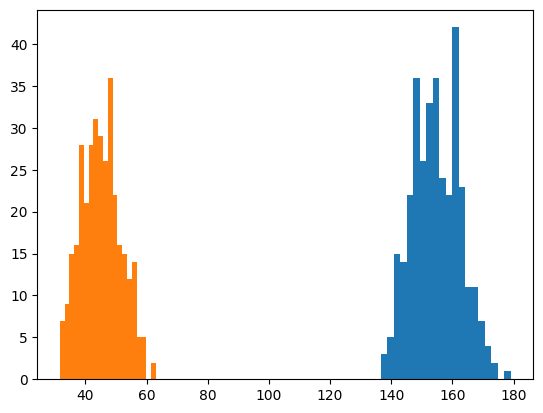

In [18]:
plt.hist(HWASo20['height'],bins=20)
plt.hist(HWASo20['weight'],bins=20)

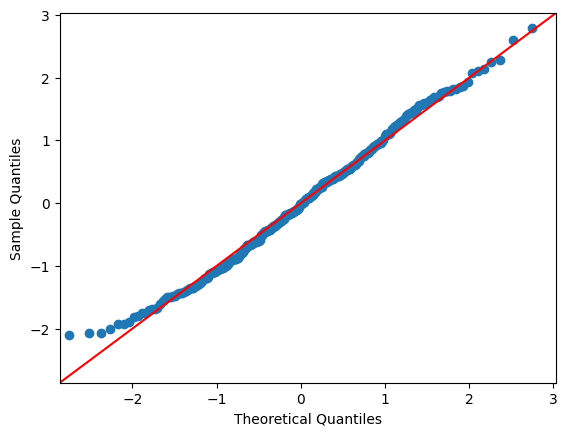

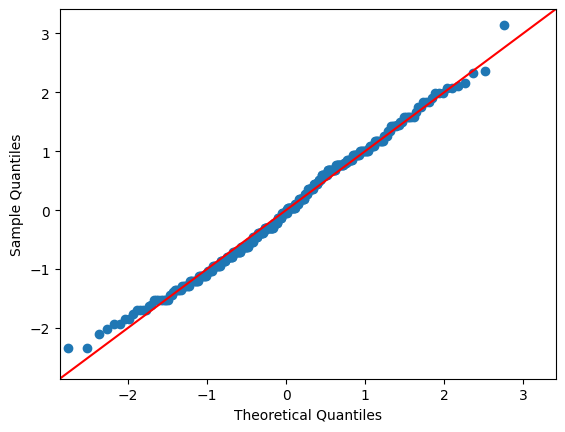

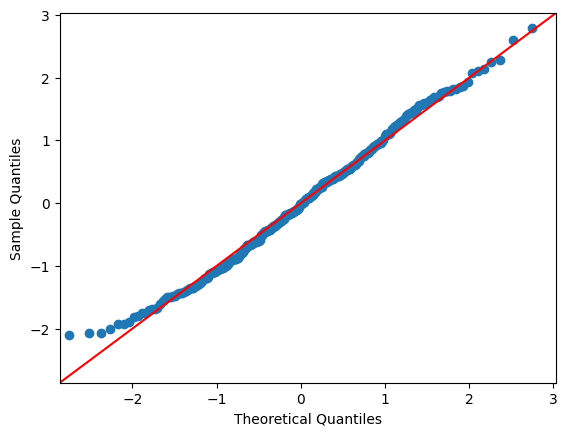

In [19]:
sm.qqplot(HWASo20['height'],fit=True, line='45')

sm.qqplot(HWASo20['weight'],fit=True, line='45')



In [20]:
hw_points = np.array([HWASo20['height'],HWASo20['weight']]).T

height_mean = np.mean(HWASo20['height'])

print(height_mean)

weight_mean = np.mean(HWASo20['weight'])

print(weight_mean)


hw_cov = np.cov(hw_points.T)

print(hw_cov)

print(HWASo20.cov())

hw_rv = multivariate_normal(mean=[height_mean,weight_mean],cov = hw_cov)

154.71749732937687
45.11329777893175
[[60.37475152 37.65129416]
 [37.65129416 41.30477214]]
           height     weight         age      male
height  60.374752  37.651294  -15.995443  2.749804
weight  37.651294  41.304772  -21.529454  1.740240
age    -15.995443 -21.529454  242.657133  0.091903
male     2.749804   1.740240    0.091903  0.250106


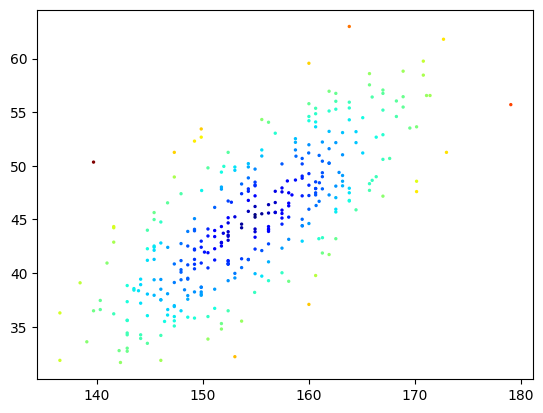

In [21]:
M_distances = np.array([distance.mahalanobis(x, hw_rv.mean, LA.inv(hw_rv.cov)) for x in hw_points])
d = M_distances**2

plt.scatter(hw_points[:,0],hw_points[:,1],c=M_distances,s=2,cmap='jet')

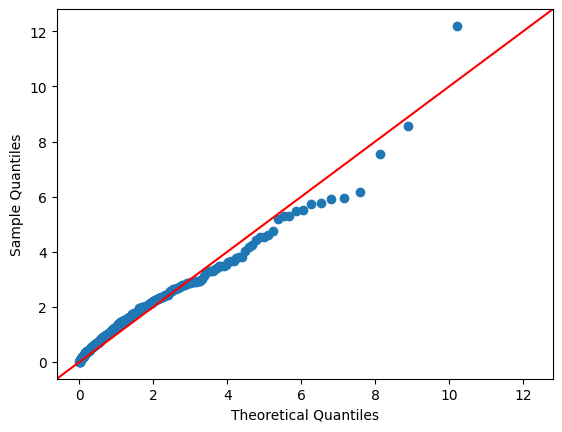

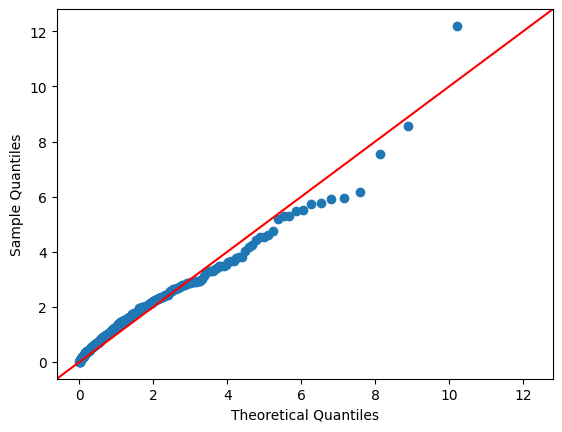

In [22]:
sm.qqplot(d, chi2, distargs=(2,), fit=True, line="45")

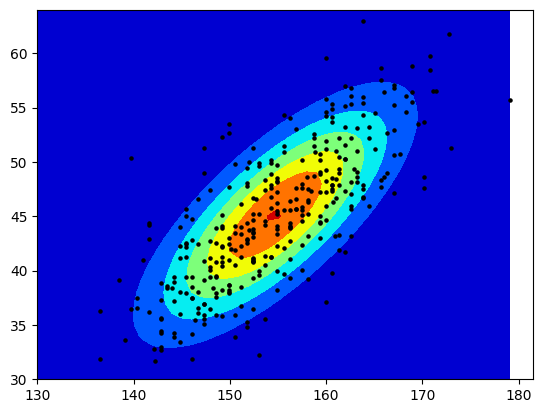

In [23]:
fig, ax = plt.subplots()

x, y= np.mgrid[130:180:1, 30:65:1]

pos = np.dstack((x, y))

ax.contourf(x, y,hw_rv.pdf(pos),cmap='jet')
ax.scatter(hw_points[:,0],hw_points[:,1],c='k',s=5)



What about the situation where our data isn't normally distributed? One approach is to try to transform the data to something that is closer to normality, as discussed in the slides.

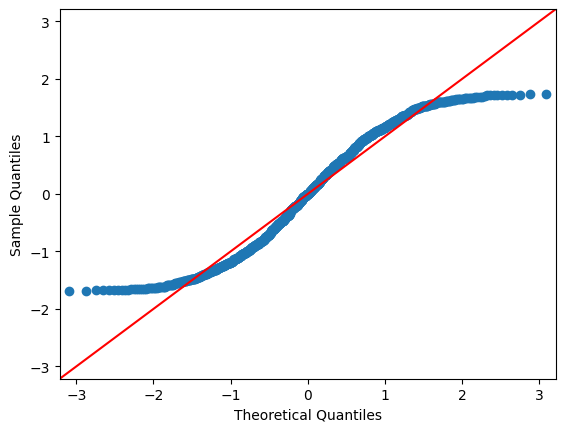

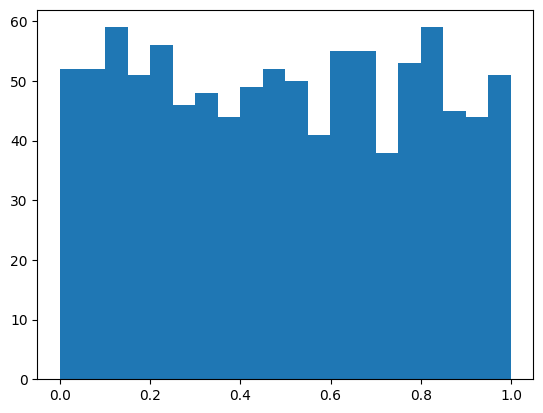

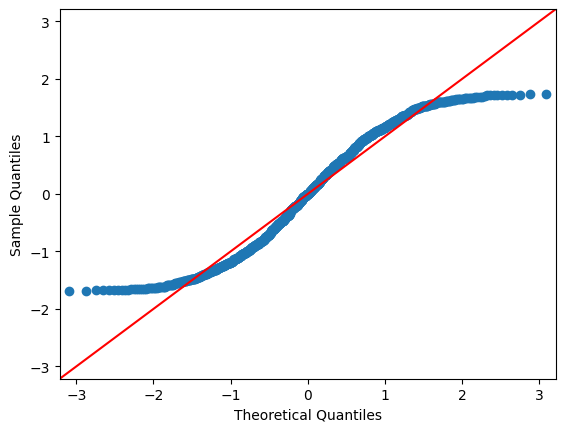

In [24]:
uniform = np.random.random(1000)

plt.hist(uniform,bins=20)

sm.qqplot(uniform, fit=True, line="45")



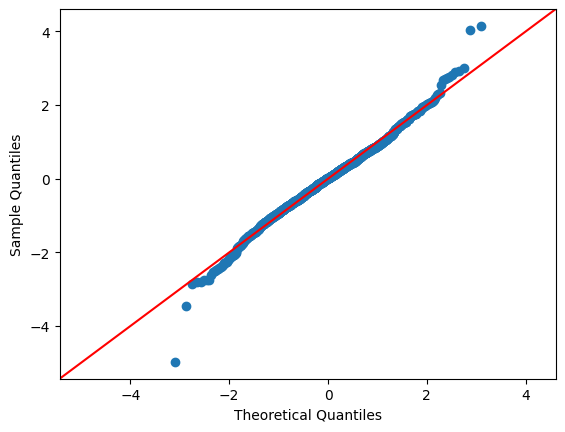

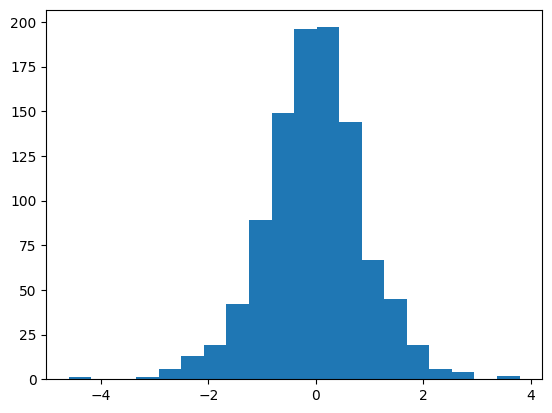

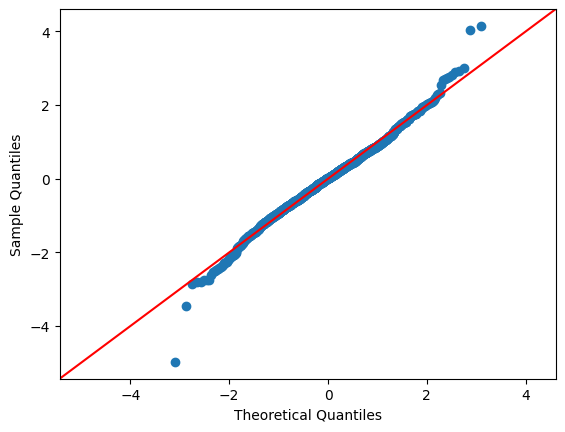

In [25]:
t_uniform = np.array([.5*np.log(x/(1-x)) for x in uniform])

plt.hist(t_uniform,bins=20)

sm.qqplot(t_uniform, fit=True, line="45")


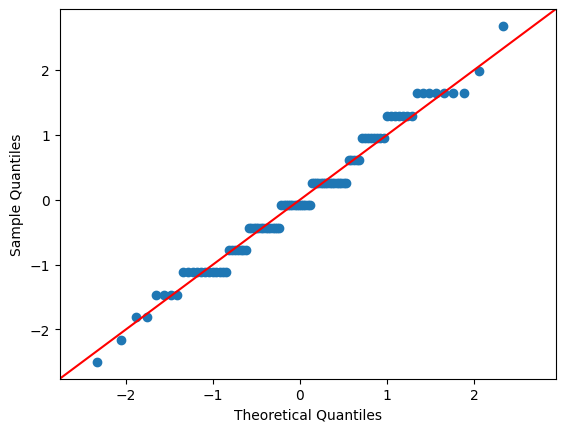

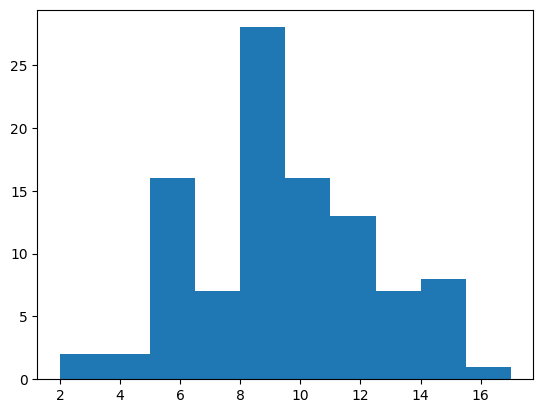

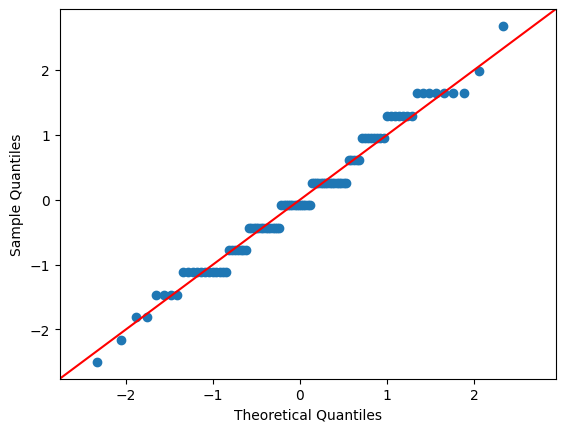

In [26]:
counts = poisson.rvs(mu=10,size=100)
plt.hist(counts)
sm.qqplot(counts, fit=True, line="45")


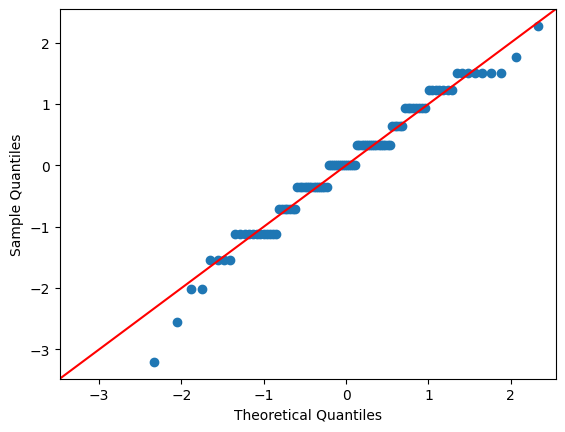

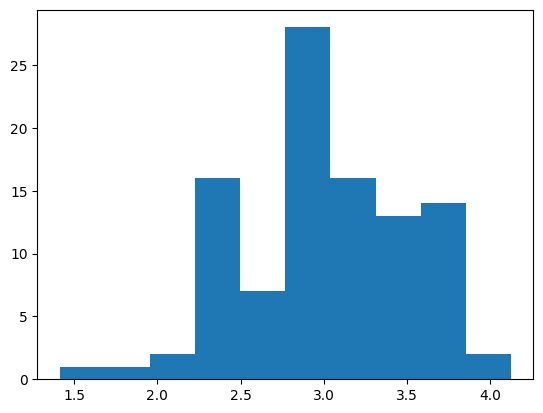

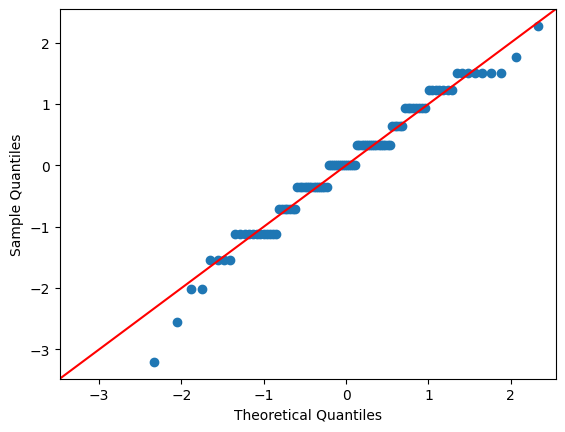

In [27]:
t_counts = np.array([np.sqrt(x) for x in counts])
plt.hist(t_counts)
sm.qqplot(t_counts, fit=True, line="45")
